In [4]:
torch.cuda.empty_cache()

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
path = Path('.')
path.ls()

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('build_arabic_language_model.ipynb'),
 WindowsPath('data'),
 WindowsPath('fine_tune_LM.ipynb'),
 WindowsPath('models')]

In [5]:
df = pd.read_csv(path/'data'/'all_arabic_wiki_2019.txt.MyD3.tok', sep='\t', header=None, names=['text'])
df.head()

,text
0,ماء ال+ ماء ماده شفافه عديمه ال+ لون و+...
1,رياضيات ال+ رياضيات علم عباره عن مفاهيم ...
2,"استونيا استونيا , رسميا جمهوريه استونيا ..."
3,"س+ نجاب ال+ سنجاب حيوان من ال+ قوارض , ..."
4,تلفاز ال+ تلفاز او ال+ تلفزه او ال+ تلفز...


In [8]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.1)
print(df_train.shape, df_val.shape)

(540503, 1) (60056, 1)


In [6]:
bs = 32

In [9]:
ar_tok = Tokenizer(lang='ar')

In [11]:
data_lm = TextLMDataBunch.from_df(path, train_df=df_train, valid_df=df_val, bs=bs, tokenizer=ar_tok, text_cols=0, label_cols=None, min_freq=5)

In [13]:
data_lm.show_batch()

idx,text
0,"ال+ نوادي , ف+ قد لعب مع و . xxbos جوهانس ريتر جوهانس ريتر هو مدرب كره قدم و+ لاعب كره قدم دانمركي في مركز ال+ وسط . لعب مع نادي نوردشيلاند . xxbos جيري xxunk جيري ريكاردو xxunk بودن هو لاعب كره قدم هندوراسي يجيد ال+ لعب ك+ مهاجم ل+ نادي xxunk ال+ ايراني . xxbos اسامه عبد ال+ واحد اسامه حمدي عبد ال+ واحد , استاذ جامعي مصري"
1,"xxunk عن حبيبات ارز xxunk و+ تواريخ ال+ كربون ال+ مشع , يشار ان زراعه ا ل+ ارز في ال+ حقول ال+ جافه قد تكون بدات في وقت مبكر من فتره فخار xxunk ال+ وسطي قبل ال+ ميلاد في شبه ال+ جزيره ال+ كوريه . تم اكتشاف حقول ال+ ارز من قبل معاهد مثل متحف جامعه xxunk في xxunk قاموا ب+ حفر مواقع حقول ال+ ارز في موقع xxunk ني"
2,"ل+ مجلس ال+ قياده , ثم تم اختيار + ه ك+ احد اعضاء ال+ مكتب ال+ سياسي ل+ ال+ حزب ال+ ديمقراطي ال+ كردستاني . في عام رقم م , تم تعيين + ه من قبل والد + ه رءيس اقليم كردستان ال+ سابق مسعود بارزاني رءيسا ل+ مجلس امن اقليم كردستان ل+ ال+ اشراف علي ال+ امن و+ ال+ مخابرات ال+ عسكريه و+ اجهزه ال+ مخابرات ال+ حاليه ."
3,"و+ هم يقومون ب+ وزن ال+ مواد ب+ ميزان , ثم صهر + ه في عده xxunk , ثم الي يمين ال+ صوره صب ال+ برونز ال+ منصهر علي لوحه صب بحيث ينتج من + ها لوحا xxunk . اثناء عمليه ال+ صب يري احد ال+ عمال جالسا و+ يمنع ب+ واسطه قطعه خشب في يد + ه , نزول ال+ شواءب ال+ طافيه علي سطح ال+ برونز ال+ منصهر"
4,"جمع ال+ قراءات , الا ان وفاه ال+ شيخ محمد سليم حالت دون ذلك , ف+ اتصل ب+ ولد + ه , ال+ شيخ احمد ال+ حلواني ال+ حفيد , و+ جمع علي + ه ال+ قراءات ال+ عشر من طريق الشاطبيه و+ ال+ دره , ثم جمع بعد ذلك ال+ عشر ال+ صغري ايضا علي ال+ شيخ محمود فاءز xxunk , ثم اتصل ب+ ال+ شيخ عبد ال+ قادر"


In [12]:
data_lm.save(path/'data'/'data_lm.pkl')

In [4]:
data_lm = load_data(path, path/'data'/'data_lm.pkl', bs = 32)

In [49]:
#pickle.dump(data_lm.train_ds.x.vocab.itos, path/'data'/'itos.pkl')
with open( path/'data'/'itos.pkl', 'wb') as pickle_file:
    pickle.dump(data_lm.train_ds.x.vocab.itos, pickle_file)

In [27]:
data_lm.train_ds.x[1].text

'xxbos فيت نغوين نغوين فيت نغوين نغوين هو مدرب كره قدم و+ لاعب كره قدم امريكي في مركز ال+ هجوم . شارك مع . اما مع ال+ نوادي , ف+ قد لعب مع و .'

## Load data for LM

In [7]:
data_lm = load_data(path/'data', 'data_lm.pkl', bs=32)

## Train LM

In [6]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.1, pretrained=False)

In [6]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


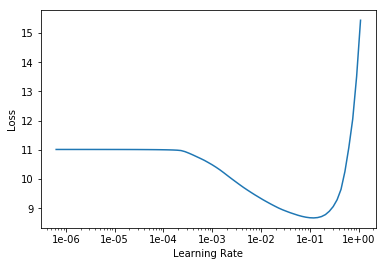

In [7]:
learn_lm.recorder.plot()

In [8]:
learn_lm.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.337320,3.258058,0.437729,3:02:59


In [9]:
learn_lm.save('Ar-LM-epoch1-acc43')

In [70]:
learn_lm.load('Ar-LM-epoch1-acc43')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (540503 items)
x: LMTextList
xxbos روبرت بيكر روبرت بيكر هو سياسي امريكي , ولد في رقم ابريل رقم في ال+ مملكه ال+ متحده , و+ توفي في رقم يونيو رقم ببروكلين في ال+ ولايات ال+ متحده . حزبيا , نشط في ال+ حزب ال+ ديمقراطي . انتخب .,xxbos فيت نغوين نغوين فيت نغوين نغوين هو مدرب كره قدم و+ لاعب كره قدم امريكي في مركز ال+ هجوم . شارك مع . اما مع ال+ نوادي , ف+ قد لعب مع و .,xxbos جوهانس ريتر جوهانس ريتر هو مدرب كره قدم و+ لاعب كره قدم دانمركي في مركز ال+ وسط . لعب مع نادي نوردشيلاند .,xxbos جيري xxunk جيري ريكاردو xxunk بودن هو لاعب كره قدم هندوراسي يجيد ال+ لعب ك+ مهاجم ل+ نادي xxunk ال+ ايراني .,xxbos اسامه عبد ال+ واحد اسامه حمدي عبد ال+ واحد , استاذ جامعي مصري ب+ جامعه عين شمس , و+ محافظ كفر ال+ شيخ ال+ سابق منذ رقم فبراير رقم حتي رقم ديسمبر رقم . ولد اسامه عبد ال+ واحد ب+ ال+ قاهره عام رقم . درس و+ تخرج في كليه ال+ هندسه ب+ جامعه عين شمس عام رقم , و+ حصل علي درجه ال+ ماجستير عام رقم , ثم ال+ دكتوراه عام رقم . شغل منصب استاذ هندسه ال+

In [9]:
learn_lm.predict('ال+ ماء من اهم ', n_words=40)

'ال+ ماء من اهم  مناطق فلسطين ال+ صناعيه ال+ شمول ال+ نهري شيوعا في فلسطين حيث ان + ه مثبط ل + ها , و+ مغطاه و+ هي محصنه من بنيه متناظر , ب+ اسنان + ها ال+ ثاقب , و+ ال+ اخشاب ال+'

In [32]:
learn_lm.predict('درس ال+ ولد ', n_words=33)

'درس ال+ ولد  في ال+ صف ال+ اول تعلم ال+ صف ال+ اخير كتاب تفسير ابي صامت ل+ ال+ علامه سعيد احمد ف+ ال+ ين كتاب السيوطي ال+ مشرف علي ال+ تكمله في ال+ مدرسه ال+'

In [ ]:
# train more...

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


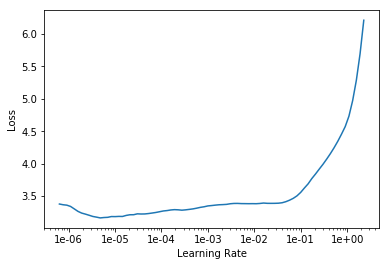

In [71]:
learn_lm.unfreeze()
#learn_lm.freeze_to(-1)
learn_lm.lr_find()
learn_lm.recorder.plot()

In [57]:
learn_lm.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3),
    callbacks=[SaveModelCallback(learn_lm, every='epoch', monitor='accuracy', name='Ar-LM_unfreeze_1e-3')])

epoch,train_loss,valid_loss,accuracy,time
0,3.363239,3.758562,0.371429,11:49:32
1,3.410845,3.742307,0.371429,3:28:51
2,3.249457,3.634851,0.414286,3:51:16


In [54]:
learn_lm.save('Ar-LM-epoch4-acc443')

In [58]:
learn_lm.predict('قال ال+ ولد ', n_words=33)

'قال ال+ ولد  لقد ذكر احمال ما هو كلام الله يرمز الي ال+ حوار ان + ه فاءده فساد ال+ تغير , و+ يلعب ب+ ال+ طرد من + ه , و+ يجبر ال+ جماهير علي'

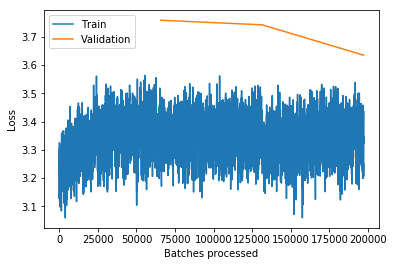

In [59]:
learn_lm.recorder.plot_losses()

In [53]:
#learn_lm.lr_find()
#learn_lm.unfreeze()
learn_lm.summary()

Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [70, 400]            0          False     
______________________________________________________________________
RNNDropout           [70, 1150]           0          False     
______________________________________________________________________
RNNDropout           [70, 1150]           0          False     
______________________________________________________________________
Linear               [70, 60006]          24,062,406 True      
______________________________________________________________________
RNNDropout           [70, 400]            0          False     
______________________________________________________________________

Total params: 24,062,406
Total trainable params: 24,062,406
Total non-trainable params: 0

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


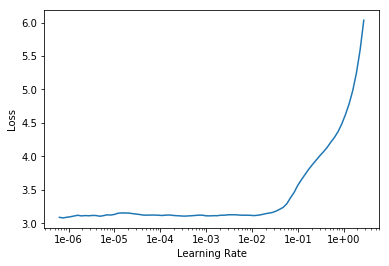

In [64]:
#learn_lm.load('Ar-LM-epoch4-acc443')
#learn_lm.unfreeze()
learn_lm.lr_find()
learn_lm.recorder.plot()

In [72]:
learn_lm.fit_one_cycle(3, 1e-3,
    callbacks=[SaveModelCallback(learn_lm, every='epoch', monitor='accuracy', name='Ar-LM_unfreeze_1e-3_after1')])

epoch,train_loss,valid_loss,accuracy,time
0,3.377989,3.854942,0.400000,3:19:10
1,3.310036,3.466055,0.457143,3:19:19
2,3.196206,3.423015,0.428571,3:19:03


In [76]:
pred = learn_lm.predict('ال+ تاريخ ال+ معاصر', n_words=33)
pred = pred.replace(' + ', '').replace('+ ', '').replace(' +', '')
pred

'التاريخ المعاصر حمص تاريخ العراق الحديث جنيننا كربلاء النصيه محاطه بتونس والخصاءص الشخصيه لثوره رقم ابريل الجبهه المءذنه هجوما يعرف بالثوره ال+'

### test LM

In [20]:
#learn_lm = load_learner(path / 'data' / 'models', 'Ar-LM_unfreeze_1e-4_after3_2_acc475.pth')
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.1, pretrained=False)
learn_lm.load('Ar-LM-epoch1-acc43')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (540503 items)
x: LMTextList
xxbos روبرت بيكر روبرت بيكر هو سياسي امريكي , ولد في رقم ابريل رقم في ال+ مملكه ال+ متحده , و+ توفي في رقم يونيو رقم ببروكلين في ال+ ولايات ال+ متحده . حزبيا , نشط في ال+ حزب ال+ ديمقراطي . انتخب .,xxbos فيت نغوين نغوين فيت نغوين نغوين هو مدرب كره قدم و+ لاعب كره قدم امريكي في مركز ال+ هجوم . شارك مع . اما مع ال+ نوادي , ف+ قد لعب مع و .,xxbos جوهانس ريتر جوهانس ريتر هو مدرب كره قدم و+ لاعب كره قدم دانمركي في مركز ال+ وسط . لعب مع نادي نوردشيلاند .,xxbos جيري xxunk جيري ريكاردو xxunk بودن هو لاعب كره قدم هندوراسي يجيد ال+ لعب ك+ مهاجم ل+ نادي xxunk ال+ ايراني .,xxbos اسامه عبد ال+ واحد اسامه حمدي عبد ال+ واحد , استاذ جامعي مصري ب+ جامعه عين شمس , و+ محافظ كفر ال+ شيخ ال+ سابق منذ رقم فبراير رقم حتي رقم ديسمبر رقم . ولد اسامه عبد ال+ واحد ب+ ال+ قاهره عام رقم . درس و+ تخرج في كليه ال+ هندسه ب+ جامعه عين شمس عام رقم , و+ حصل علي درجه ال+ ماجستير عام رقم , ثم ال+ دكتوراه عام رقم . شغل منصب استاذ هندسه ال+

In [66]:
pred = 'و+ تقع دوله'
pred = learn_lm.predict(pred, n_words=30, temperature=0.6)
pred = pred.replace(' + ', '').replace('+ ', '').replace(' +', '')
pred

'وتقع دوله الامارات العربيه المتحده في المملكه العربيه السعوديه وتعمل الدوله علي دوله الامارات العربيه المتحده ودوله الامارات ال+'